# 🧠 Bonus Assignment - CS5720
## Question 1: Question Answering with Transformers

In [ ]:
# Install necessary libraries
!pip install transformers torch --quiet
# Step 1: Basic QA Pipeline
from transformers import pipeline

qa_pipeline = pipeline("question-answering")

context = "Charles Babbage is considered the father of the computer."
question = "Who is considered the father of the computer?"

result = qa_pipeline(question=question, context=context)
print(result)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.7 MB/s eta 0:00:00


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


{'score': 0.9972344040870667, 'start': 0, 'end': 15, 'answer': 'Charles Babbage'}


In [ ]:
# Step 2: Using custom pretrained model
qa_pipeline = pipeline("question-answering", model="deepset/roberta-base-squad2")

result = qa_pipeline(question=question, context=context)
print(result)

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cpu


{'score': 0.9830346703529358, 'start': 0, 'end': 15, 'answer': 'Charles Babbage'}


In [ ]:
# Step 3: Custom context and questions
custom_context = "The University of Central Missouri is located in Warrensburg. It was founded in 1871."

q1 = "Where is the University of Central Missouri located?"
q2 = "When was the university founded?"

print(qa_pipeline(question=q1, context=custom_context))
print(qa_pipeline(question=q2, context=custom_context))

{'score': 0.9903095960617065, 'start': 49, 'end': 60, 'answer': 'Warrensburg'}
{'score': 0.9294794201850891, 'start': 80, 'end': 84, 'answer': '1871'}


## Question 2: Conditional GAN on MNIST

100%|██████████| 9.91M/9.91M [00:00<00:00, 53.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 2.00MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.0MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.16MB/s]


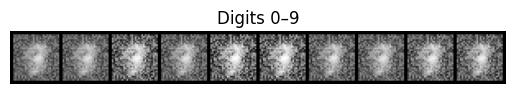

In [ ]:
# Imports
import torch, torch.nn as nn, torch.optim as optim
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

# Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
latent_dim, num_classes, img_size = 100, 10, 28*28

# Generator
class G(nn.Module):
    def __init__(self):
        super().__init__()
        self.label = nn.Embedding(num_classes, 10)
        self.net = nn.Sequential(
            nn.Linear(latent_dim + 10, 128), nn.ReLU(),
            nn.Linear(128, 256), nn.ReLU(),
            nn.Linear(256, img_size), nn.Tanh()
        )
    def forward(self, z, y): return self.net(torch.cat([z, self.label(y)], 1))

# Discriminator
class D(nn.Module):
    def __init__(self):
        super().__init__()
        self.label = nn.Embedding(num_classes, 10)
        self.net = nn.Sequential(
            nn.Linear(img_size + 10, 256), nn.LeakyReLU(0.2),
            nn.Linear(256, 1), nn.Sigmoid()
        )
    def forward(self, x, y): return self.net(torch.cat([x, self.label(y)], 1))

# Data
loader = DataLoader(MNIST('.', train=True, download=True, transform=transforms.ToTensor()), batch_size=128, shuffle=True)

# Models
G, D = G().to(device), D().to(device)
opt_G = optim.Adam(G.parameters(), lr=2e-4)
opt_D = optim.Adam(D.parameters(), lr=2e-4)
loss_fn = nn.BCELoss()

# Training (5 quick epochs)
for epoch in range(5):
    for real, y in loader:
        bs = real.size(0)
        real, y = real.view(bs, -1).to(device), y.to(device)
        z = torch.randn(bs, latent_dim).to(device)
        y_fake = torch.randint(0, num_classes, (bs,)).to(device)
        fake = G(z, y_fake)

        # Train Discriminator
        D_loss = (loss_fn(D(real, y), torch.ones(bs, 1).to(device)) +
                  loss_fn(D(fake.detach(), y_fake), torch.zeros(bs, 1).to(device))) / 2
        opt_D.zero_grad(); D_loss.backward(); opt_D.step()

        # Train Generator
        G_loss = loss_fn(D(fake, y_fake), torch.ones(bs, 1).to(device))
        opt_G.zero_grad(); G_loss.backward(); opt_G.step()

# Generate digits 0–9
G.eval()
z = torch.randn(10, latent_dim).to(device)
labels = torch.arange(0, 10).to(device)
samples = G(z, labels).view(-1, 1, 28, 28).cpu().detach()
grid = make_grid(samples, nrow=10, normalize=True)
plt.imshow(grid.permute(1, 2, 0)); plt.axis('off'); plt.title("Digits 0–9"); plt.show()


### Short Answer
**How does a Conditional GAN differ from a vanilla GAN?**
> Conditional GANs add a condition (like labels) to both generator and discriminator to control the output.

**Real-world Application:**
> Generating faces with specific attributes like smiling, male, or glasses.

**What does the discriminator learn in image-to-image GANs?**
> It learns to distinguish between real and fake pairs. Pairing helps enforce the correct mapping between input and output (e.g., edges to photo).